# Import libraries

In [33]:
%config Completer.use_jedi = False
import os
import cv2
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

print(f"Tensorflow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")

Tensorflow version: 2.4.1
Keras version: 2.4.0


# Get an image and its label to validate in the model

I am going to get the images from the original training set, which I didn't use in this exploratory analysis.

In [29]:
val_df = pd.read_csv('training_singles.csv')

list_labels = [('cloud_shadow', 0), ('double_plant', 1), ('planter_skip', 2), 
               ('standing_water', 3), ('waterway', 4), ('weed_cluster', 5)]

for l in list_labels:
    val_df[l[0]] = val_df[l[0]].replace(1, l[1])
    
val_df['filename'] = val_df['filename'].str.split('/').str[-1].str[:-4]+'.jpg'

val_df

,filename,cloud_shadow,double_plant,planter_skip,standing_water,waterway,weed_cluster
0,1DJX4RH9N_768-380-1280-892.jpg,0.0,0.0,0.0,0.0,0.0,0.0
1,1DJX4RH9N_1609-506-2121-1018.jpg,0.0,0.0,0.0,0.0,0.0,0.0
2,1DJX4RH9N_1792-892-2304-1404.jpg,0.0,0.0,0.0,0.0,0.0,0.0
3,1DJX4RH9N_2121-506-2633-1018.jpg,0.0,0.0,0.0,0.0,0.0,0.0
4,1DJX4RH9N_2304-892-2816-1404.jpg,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
14431,ZT13DBZBJ_3401-788-3913-1300.jpg,0.0,0.0,0.0,0.0,0.0,5.0
14432,ZT13DBZBJ_3672-616-4184-1128.jpg,0.0,0.0,0.0,0.0,0.0,5.0
14433,ZT13DBZBJ_3913-788-4425-1300.jpg,0.0,0.0,0.0,0.0,0.0,5.0
14434,ZVXKGVAPQ_2360-5356-2872-5868.jpg,0.0,0.0,0.0,0.0,0.0,5.0


# Set functions

In [64]:
def read_image(data_x):
    """Read obj with the path for images.
    data_x ==  *_x
    """

    W, H = 300, 300 # set final size

    x = cv2.imread(data_x, cv2.IMREAD_COLOR) # read in colors
    x = cv2.resize(x, (W, H)) # resize
    x = x / 255.0 # normalize values 0 to 1
    x = x.astype(np.float32) # make it np.float32
    
    return x


def get_label(label):

    list_labels = [('Cloud shadow', 0), ('Double plant', 1), ('Planter skip', 2), 
               ('Standing water', 3), ('Waterway', 4), ('Weed cluster', 5)]
    
    for l in list_labels:
        if label == l[1]:
            return l[0]


# Load CNN model

In [12]:
cnn_model = keras.models.load_model('./model_1_CNN')

# Make a prediction on a single image

The label: Weed cluster, and the predicted label: Double plant


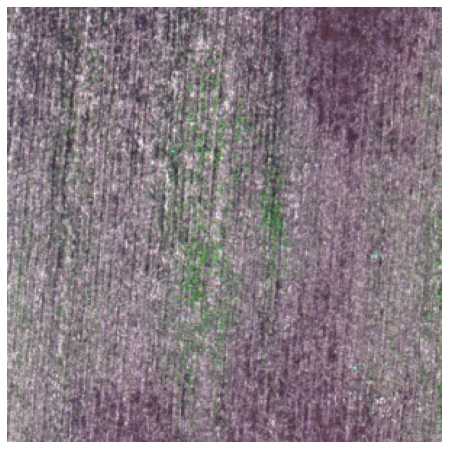

In [67]:
# take a sample (== one random row) from val_df
sample = val_df.sample()
# get filename
image = sample['filename'].to_list()[0]
# get label
label = int(sample.sum(axis=1).to_list()[0])
# get path to the image
image_path = os.path.join('dataset', 'Agriculture-Vision', 'train', 'images', 'rgb', image)
# assert it exists
assert os.path.exists(image_path) == True

# predict

prediction = cnn_model.predict(np.array([img]))
predicted_value = np.argmax(prediction)

# plot the image and check if label match...
img = read_image(image_path)
print(f"The label: {get_label(label)}, and the predicted label: {get_label(predicted_value)}")
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.axis('off');